In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64 
VALIDATION_STEPS = 25
BATCH_SIZE = 32
EPOCHS = 25
STEPS_PER_EPOCH = 100

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'tanh'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory('data/training_set',
                                                 target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [8]:
training_set.class_indices

{'matheus': 0, 'naiara': 1}

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
test_set = test_datagen.flow_from_directory('data/test_set',
                                            target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 84 images belonging to 2 classes.


In [11]:
classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set.filenames) // BATCH_SIZE, #STEPS_PER_EPOCH,
                         epochs = EPOCHS,
                         validation_data = test_set,
                         validation_steps = VALIDATION_STEPS)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
7/7 [==============================] - 24s 3s/step - loss: 0.6994 - acc: 0.4732 - val_loss: 0.6886 - val_acc: 0.5241
Epoch 2/25
7/7 [==============================] - 19s 3s/step - loss: 0.6966 - acc: 0.4931 - val_loss: 0.6945 - val_acc: 0.5043
Epoch 3/25
7/7 [==============================] - 21s 3s/step - loss: 0.6590 - acc: 0.6285 - val_loss: 0.7075 - val_acc: 0.5275
Epoch 4/25
7/7 [==============================] - 21s 3s/step - loss: 0.5686 - acc: 0.6878 - val_loss: 0.7423 - val_acc: 0.5966
Epoch 5/25
7/7 [==============================] - 21s 3s/step - loss: 0.5688 - acc: 0.7016 - val_loss: 0.6948 - val_acc: 0.5611
Epoch 6/25
7/7 [==============================] - 21s 3s/step - loss: 0.5389 - acc: 0.7248 - val_loss: 0.7258 - val_acc: 0.6301
Epoch 7/25
7/7 [==============================] - 22s 3s/step - loss: 0.4932 - acc: 0.7939 - val_loss: 0.7130 - val_acc: 0.5838
Epoch 8/25
7/7 [==============================] - 20s 3s

In [12]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
__________

In [14]:
classifier.evaluate_generator(generator=test_set, steps=VALIDATION_STEPS)

[0.7244904511581266, 0.7471098269341309]

In [162]:
loss, metric = classifier.evaluate_generator(generator=test_set, steps=VALIDATION_STEPS)

In [163]:
print('loss:', loss)
print('acc:', metric)

loss: 0.7477634489874948
acc: 0.7315340898931026


In [154]:
test = image.load_img('./data/single_prediction/matheus-naiara-05.jpg', target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))

In [155]:
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

In [156]:
classes = classifier.predict_classes(test)

In [157]:
classes

array([[0]], dtype=int32)

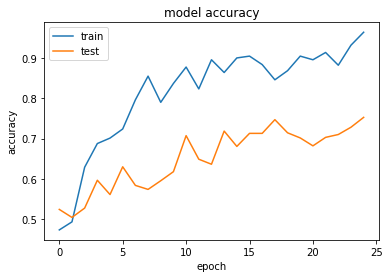

In [15]:
# With TANH
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

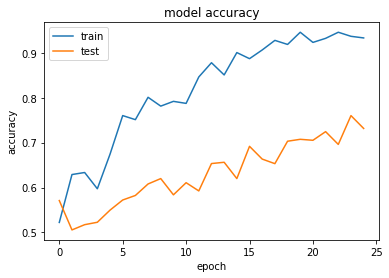

In [160]:
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

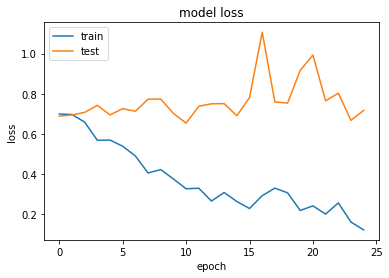

In [16]:
# WITH TANH
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

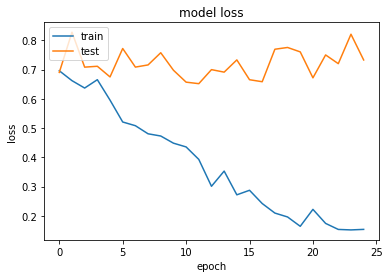

In [161]:
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()